In [ ]:
#import the libraries

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

In [3]:
#Image Augmentation

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,vertical_flip=True)

In [6]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
#create the model

In [8]:
x_train = train_datagen.flow_from_directory(r"E:\Flowers\Training",target_size=(128,128),batch_size=32,class_mode="categorical")

Found 4317 images belonging to 5 classes.


In [9]:
x_test = test_datagen.flow_from_directory(r"E:\Flowers\Testing",target_size=(128,128),batch_size=32,class_mode="categorical")

Found 2576 images belonging to 5 classes.


In [10]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [11]:
model = Sequential()

In [12]:
#Add layers

In [13]:
#Convolution layer

In [14]:
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))

In [15]:
#Maxpooling layer

In [16]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [17]:
#flatten layer

In [18]:
model.add(Flatten())

In [19]:
#hidden layer

In [20]:
model.add(Dense(units=300,kernel_initializer="random_uniform",activation="relu"))

In [21]:
model.add(Dense(units=200,kernel_initializer="random_uniform",activation="relu"))

In [22]:
#output layer

In [23]:
model.add(Dense(units=5,kernel_initializer="random_uniform",activation="softmax"))

In [24]:
#compile the model

In [25]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [26]:
#Fit the model

In [27]:
model.fit_generator(x_train,steps_per_epoch=135,epochs=25,validation_data=x_test,validation_steps=80)

C:\Users\acer\AppData\Local\Temp\ipykernel_4216\3124921301.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train,steps_per_epoch=135,epochs=25,validation_data=x_test,validation_steps=80)


Epoch 1/25
135/135 [==============================] - 145s 1s/step - loss: 1.3076 - accuracy: 0.4443 - val_loss: 1.1110 - val_accuracy: 0.5617
Epoch 2/25
135/135 [==============================] - 89s 657ms/step - loss: 1.0743 - accuracy: 0.5749 - val_loss: 1.0354 - val_accuracy: 0.5984
Epoch 3/25
135/135 [==============================] - 110s 814ms/step - loss: 0.9782 - accuracy: 0.6074 - val_loss: 0.9868 - val_accuracy: 0.6090
Epoch 4/25
135/135 [==============================] - 85s 632ms/step - loss: 0.9176 - accuracy: 0.6370 - val_loss: 0.8892 - val_accuracy: 0.6441
Epoch 5/25
135/135 [==============================] - 78s 575ms/step - loss: 0.8748 - accuracy: 0.6593 - val_loss: 0.8656 - val_accuracy: 0.6582
Epoch 6/25
135/135 [==============================] - 77s 570ms/step - loss: 0.8342 - accuracy: 0.6799 - val_loss: 0.7632 - val_accuracy: 0.7074
Epoch 7/25
135/135 [==============================] - 78s 577ms/step - loss: 0.8015 - accuracy: 0.6921 - val_loss: 0.7861 - val_acc

In [ ]:
#Save the model

In [28]:
model.save("flower.h5")

In [ ]:
#Test the model

In [2]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [3]:
import numpy as np

In [4]:
model = load_model("Flower.h5")

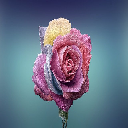

In [6]:
img = image.load_img(r"C:\Users\acer\Downloads\rose.jpg",target_size=(128,128))
img

In [7]:
type(img)

PIL.Image.Image

In [9]:
x = image.img_to_array(img)
x

array([[[ 52.,  60.,  96.],
        [ 51.,  59.,  95.],
        [ 50.,  58.,  95.],
        ...,
        [ 54.,  67.,  99.],
        [ 55.,  69.,  98.],
        [ 55.,  69.,  96.]],

       [[ 54.,  62.,  98.],
        [ 52.,  60.,  96.],
        [ 51.,  59.,  96.],
        ...,
        [ 54.,  67.,  99.],
        [ 56.,  70.,  99.],
        [ 57.,  71.,  98.]],

       [[ 56.,  64., 100.],
        [ 53.,  61.,  97.],
        [ 52.,  60.,  97.],
        ...,
        [ 56.,  69., 101.],
        [ 57.,  71., 100.],
        [ 58.,  72.,  99.]],

       ...,

       [[ 54.,  78., 104.],
        [ 57.,  81., 107.],
        [ 56.,  82., 107.],
        ...,
        [ 43.,  63.,  88.],
        [ 42.,  62.,  87.],
        [ 41.,  61.,  86.]],

       [[ 54.,  78., 104.],
        [ 56.,  80., 106.],
        [ 56.,  82., 107.],
        ...,
        [ 42.,  62.,  87.],
        [ 41.,  61.,  86.],
        [ 41.,  61.,  86.]],

       [[ 55.,  79., 105.],
        [ 54.,  78., 104.],
        [ 55.,  

In [10]:
x.shape

(128, 128, 3)

In [11]:
x = np.expand_dims(x,axis=0)
x.shape

(1, 128, 128, 3)

In [12]:
pred_prob = model.predict(x)
pred_prob

1/1 [==============================] - 1s 1s/step


array([[0., 0., 1., 0., 0.]], dtype=float32)

In [13]:
class_name = ["daisy","dandelion","rose","sunfower","tulip"]
pred_id = pred_prob.argmax(axis=1)[0]
pred_id

2

In [14]:
print("Predicted animal is",str(class_name[pred_id]))

Predicted animal is rose
